### About Data

<pre>
Some Key Details
Suburb  : Suburb
Address : Address
Rooms   : Number of rooms
Price   : Price in Australian dollars

Method:
S   - property sold;
SP  - property sold prior;
PI  - property passed in;
PN  - sold prior not disclosed;
SN  - sold not disclosed;
NB  - no bid;
VB  - vendor bid;
W   - withdrawn prior to auction;
SA  - sold after auction;
SS  - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br        - bedroom(s);
h         - house,cottage,villa, semi,terrace;
u         - unit, duplex;
t         - townhouse;
dev site  - development site;
o res     - other residential.

SellerG       : Real Estate Agent
Date          : Date sold
Distance      : Distance from CBD in Kilometres
Regionname    : General Region (West, North West, North, North east …etc)
Propertycount : Number of properties that exist in the suburb.
Bedroom2      : Scraped # of Bedrooms (from different source)
Bathroom      : Number of Bathrooms
Car           : Number of carspots
Landsize      : Land Size in Metres
BuildingArea  : Building Size in Metres
YearBuilt     : Year the house was built
CouncilArea   : Governing council for the area
Lattitude     : Self explanitory
Longtitude    : Self explanitory
<pre>

### Model of Machine Learning For This Prediction

<pre>
Liniear Regression Normalized
Liniear Regression
Ridge Model
RandomForestClassifier 
XGBClassifier 
<pre>

In [1]:
# Import Libraries needed
# Data cleaning and manipulation 
import numpy as np
import pandas as pd

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Filter the warnings
import warnings
warnings.filterwarnings('ignore')

# Machine learning model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# Define a dataset as df
df = pd.read_csv('D:\Imam\Belajar\Python\Data_Science\House_Price_Prediction\Melbourne_House_Price\Melbourne_housing_full.csv', sep =',')

In [3]:
#Check data
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


#### We can see the data have a Nan value

In [4]:
#Check row, column in dataframe
df.shape

(34857, 21)

In [5]:
#Check the Nan value
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
#Check the Null value
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

#### This data have many data Nan and Null, so we drop it

In [7]:
#Drop the Nan data
df = df.dropna().reset_index()

In [8]:
# Check data
df

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
1,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
2,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
3,11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.80240,144.99930,Northern Metropolitan,4019.0
4,14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,34847,Wollert,27 Birchmore Rd,3,h,500000.0,PI,Ray,24/02/2018,25.5,...,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0
8883,34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,24/02/2018,25.5,...,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
8884,34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
8885,34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [9]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8887 non-null   int64  
 1   Suburb         8887 non-null   object 
 2   Address        8887 non-null   object 
 3   Rooms          8887 non-null   int64  
 4   Type           8887 non-null   object 
 5   Price          8887 non-null   float64
 6   Method         8887 non-null   object 
 7   SellerG        8887 non-null   object 
 8   Date           8887 non-null   object 
 9   Distance       8887 non-null   float64
 10  Postcode       8887 non-null   float64
 11  Bedroom2       8887 non-null   float64
 12  Bathroom       8887 non-null   float64
 13  Car            8887 non-null   float64
 14  Landsize       8887 non-null   float64
 15  BuildingArea   8887 non-null   float64
 16  YearBuilt      8887 non-null   float64
 17  CouncilArea    8887 non-null   object 
 18  Lattitud

In [10]:
df.describe()

,index,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,15111.555868,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,9921.898581,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,2.000000,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,6812.000000,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,13841.000000,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,22629.000000,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,34856.000000,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [11]:
# Change the type of dataframe from object to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Separate the year, month, and day from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop(columns = 'Date', inplace = True)

In [12]:
df.shape

(8887, 24)

#### Raw data have shape (34857, 21), now we have data shape (8887, 24)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8887 non-null   int64  
 1   Suburb         8887 non-null   object 
 2   Address        8887 non-null   object 
 3   Rooms          8887 non-null   int64  
 4   Type           8887 non-null   object 
 5   Price          8887 non-null   float64
 6   Method         8887 non-null   object 
 7   SellerG        8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtitu

In [14]:
# Check the number of unique for column with type object

Number_Suburb_Unique = df['Suburb'].nunique()
Number_Address_Unique = df['Address'].nunique()
Number_Type_Unique = df['Type'].nunique()
Number_Method_Unique = df['Method'].nunique()
Number_SellerG_Unique = df['SellerG'].nunique()
Number_CouncilArea_Unique = df['CouncilArea'].nunique()
Number_Regionname_Unique = df['Regionname'].nunique()

In [15]:
print (f'Length Suburb Unique      :{Number_Suburb_Unique}\n'
       f'Length Address Unique     :{Number_Address_Unique}\n'
       f'Length Type Unique        :{Number_Type_Unique}\n'
       f'Length Method Unique      :{Number_Method_Unique}\n'
       f'Length SellerG Unique     :{Number_SellerG_Unique}\n'
       f'Length CouncilArea Unique :{Number_CouncilArea_Unique}\n'
       f'Length Regionname Unique  :{Number_Regionname_Unique}\n')

Length Suburb Unique      :315
Length Address Unique     :8764
Length Type Unique        :3
Length Method Unique      :5
Length SellerG Unique     :250
Length CouncilArea Unique :33
Length Regionname Unique  :8



#### For Type, Method, and Regionname have small unique number
##### So we will translate it to number

In [16]:
# Drop the column with big unique number
df.drop(['Suburb', 'Address', 'Method', 'SellerG', 'CouncilArea'], axis = 1, inplace = True)

In [17]:
# Translate unique type to number
df['Type'] = df['Type'].replace(['h', 'u', 't'], ['1','2','3'])
df['Type'] = df['Type'].astype('int64')

# Translate unique Regionname to number
df = df.replace(df['Regionname'].unique(), [f'{i}' for i in range(1, df['Regionname'].nunique() + 1)])
df['Regionname'] = df['Regionname'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8887 non-null   int64  
 1   Rooms          8887 non-null   int64  
 2   Type           8887 non-null   int64  
 3   Price          8887 non-null   float64
 4   Distance       8887 non-null   float64
 5   Postcode       8887 non-null   float64
 6   Bedroom2       8887 non-null   float64
 7   Bathroom       8887 non-null   float64
 8   Car            8887 non-null   float64
 9   Landsize       8887 non-null   float64
 10  BuildingArea   8887 non-null   float64
 11  YearBuilt      8887 non-null   float64
 12  Lattitude      8887 non-null   float64
 13  Longtitude     8887 non-null   float64
 14  Regionname     8887 non-null   int64  
 15  Propertycount  8887 non-null   float64
 16  Year           8887 non-null   int64  
 17  Month          8887 non-null   int64  
 18  Day     

#### Now all column don't have object type

In [19]:
df

,index,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day
0,2,2,1,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,1,4019.0,2016,4,2
1,4,3,1,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,1,4019.0,2017,4,3
2,6,4,1,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,1,4019.0,2016,4,6
3,11,3,1,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,1,4019.0,2016,7,5
4,14,2,1,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,1,4019.0,2016,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,34847,3,1,500000.0,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,2016.0,-37.61940,145.03951,1,2940.0,2018,2,24
8883,34849,3,1,570000.0,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,-37.61031,145.03393,1,2940.0,2018,2,24
8884,34853,2,1,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,2,6543.0,2018,2,24
8885,34854,2,3,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,2,6543.0,2018,2,24


In [20]:
# initiation dataframe machine learning as df_learning
df_Learning = df

# Create machine learning

On this section we will using machine learning : <br>
- LinearRegression with Data Normalization 
- LinearRegression without Data Normalization
- Ridge Model

#### For Linear Regression we will see the corelation between columns

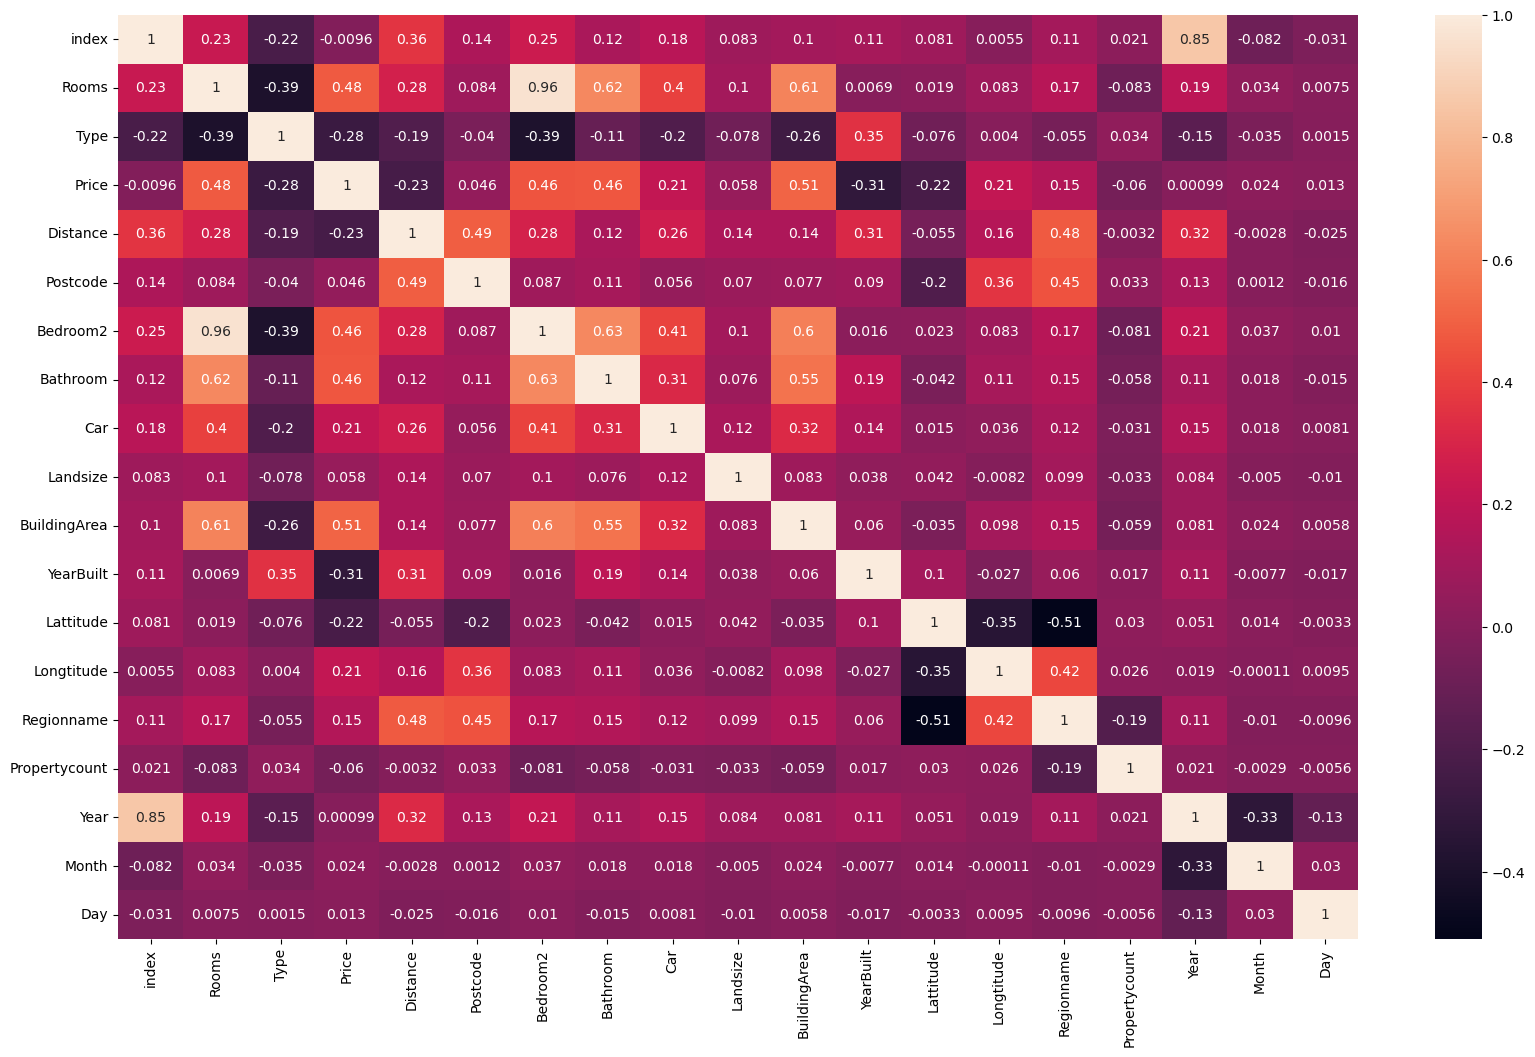

In [21]:
# See the correlation between columns
cormap = df_Learning.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cormap, annot = True)
plt.show()

In [22]:
# Drop column with minus correlation
df_Learning = df_Learning.drop(['index', 'Type', 'Lattitude', 'Longtitude', 'Regionname'], axis = 1)

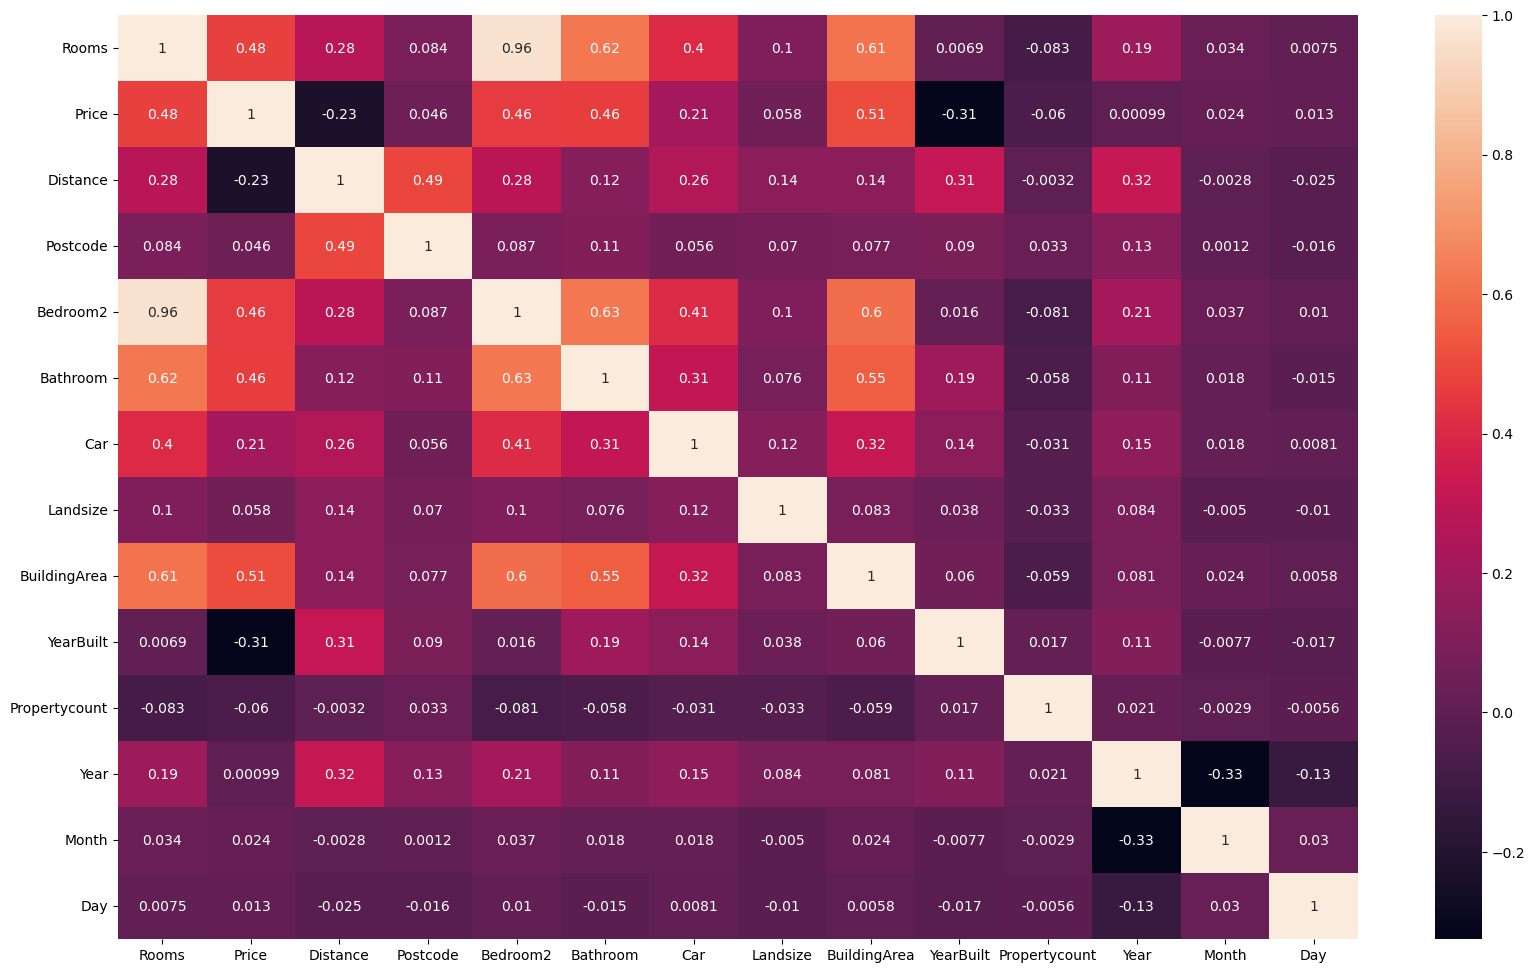

In [23]:
cormap = df_Learning.corr()
plt.figure(figsize = (20,12))
sns.heatmap(cormap, annot = True)
plt.show()

In [24]:
df_Learning.describe(percentiles=[])

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Year,Month,Day
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,7475.940137,2016.724204,6.722404,15.954878
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,4375.024364,0.657290,2.961684,8.166336
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,249.000000,2016.000000,1.000000,1.000000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,6567.000000,2017.000000,7.000000,16.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,21650.000000,2018.000000,12.000000,30.000000


### Set the data target (y) and data train (X)

In [25]:
# Set the target(y) and features(x) as df_learning
target = df_Learning['Price']
df_Learning = df_Learning.drop(['Price'], axis = 1)
df_Learning.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Year,Month,Day
0,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0,2016,4,2
1,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0,2017,4,3
2,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0,2016,4,6
3,3,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,4019.0,2016,7,5
4,2,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,4019.0,2016,8,10


In [26]:
# Split data with ratio of train:test = 80%:20%
X_train, X_test, y_train, y_test = train_test_split(df_Learning, target, random_state = 42, train_size = 0.8)

print(f'train size  : {X_train.shape[0]}\n'
      f'test_size   : {X_test.shape[0]}\n'
      f'total_size  : {df.shape[0]}')

train size  : 7109
test_size   : 1778
total_size  : 8887


### A. Linear Regression with data normalization

In [27]:
#Make a Linear Regression with Data Normalization (fit_intercept=False)
model_LR = LinearRegression(fit_intercept=False)
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

print(f'num_features : {X_train.shape[1]}\n'
      f'num_coeff    : {len(model_LR.coef_)}')

num_features : 13
num_coeff    : 13


In [28]:
print('MAE:', mean_absolute_error(y_test, y_pred_LR))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_LR)))
print('R2 Score:', r2_score(y_test, y_pred_LR))

MAE: 276635.6708547366
RMSE: 390453.8389652317
R2 Score: 0.6032022714616969


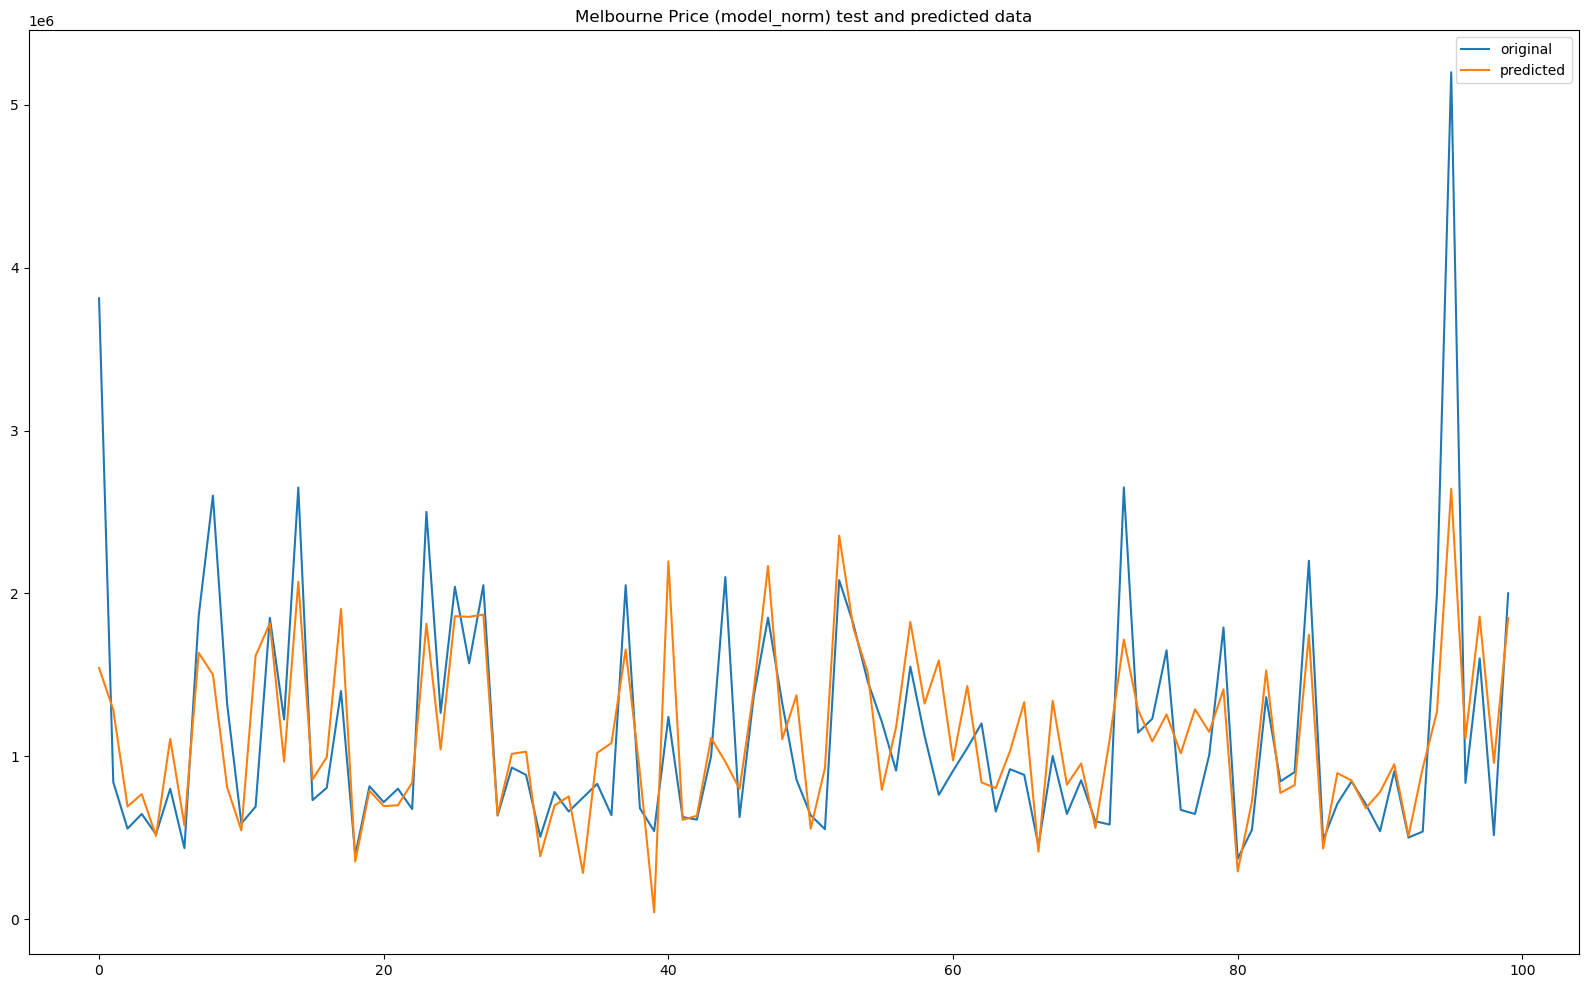

In [29]:
# Graph 100 data to see each data from the original data and predicted for LinearRegression with normalization

X = range(len(y_test.iloc[:100]))
plt.figure(figsize=(20,12))
plt.plot(X, y_test.iloc[:100], label="original")
plt.plot(X, y_pred_LR[:100], label="predicted")
plt.title("Melbourne Price (model_norm) test and predicted data")
plt.legend()
plt.show()

### Create a dataframe that will be using to see MAE, RMSE, and R2-score

In [30]:
# Initiation column = MAE,RMSE,R2-score
results= pd.DataFrame(columns=['MAE','RMSE','R2-score'])

# create new row with MAE, RMSE, and R2-score from Linear Regression
results.loc['Linear Regression']=[mean_absolute_error(y_test,y_pred_LR),mean_squared_error(y_test, y_pred_LR, squared=False),r2_score(y_test,y_pred_LR)]

In [31]:
# Normalize data using StandardScaler (Scaling)
from sklearn.preprocessing import StandardScaler
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_scale.set_index(X_train.index, inplace = True)
X_test_scale = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
X_test_scale.set_index(X_test.index, inplace = True)

### B. Linear Regression without data normalization

In [32]:
#Make a Linear Regression without Data Normalization (fit_intercept=True)
model_norm = LinearRegression(fit_intercept=True)
model_norm.fit(X_train_scale, y_train)
y_pred_norm = model_norm.predict(X_test_scale)

In [33]:
print('MAE:', mean_absolute_error(y_test, y_pred_norm))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_norm)))
print('R2 Score:', r2_score(y_test, y_pred_norm))

MAE: 278037.1435475111
RMSE: 390933.29941921623
R2 Score: 0.6022271721862649


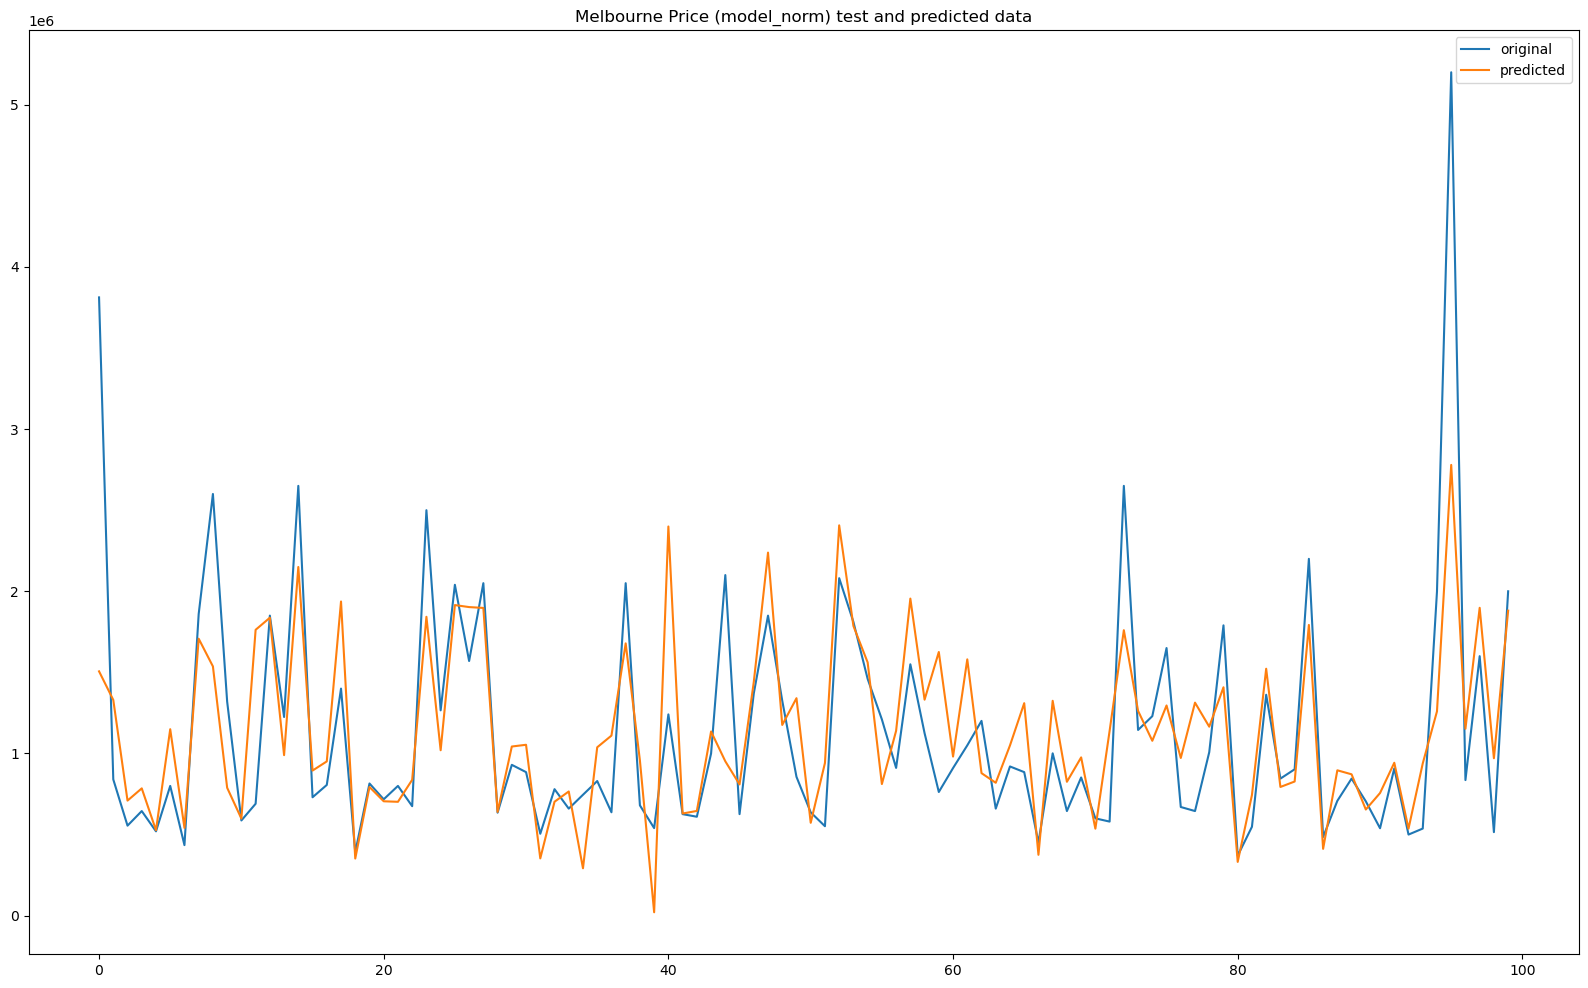

In [34]:
# Graph 100 data to see each data from the original data and predicted for LinearRegression without normalization

X = range(len(y_test.iloc[:100]))
plt.figure(figsize=(20,12))
plt.plot(X, y_test.iloc[:100], label="original")
plt.plot(X, y_pred_norm[:100], label="predicted")
plt.title("Melbourne Price (model_norm) test and predicted data")
plt.legend()
plt.show()

In [35]:
# create new row with MAE, RMSE, and R2-score from Linear Regression Normalized
results.loc['Linear Regression Normalized']=[mean_absolute_error(y_test,y_pred_norm),mean_squared_error(y_test, y_pred_norm, squared=False),r2_score(y_test,y_pred_norm)]

### C. Linear Regression Model Ridge

In [36]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scale, y_train)

Ridge(alpha=0.5)

In [37]:
y_pred_ridge = ridge_model.predict(X_test_scale)

In [38]:
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('R2 Score:', r2_score(y_test, y_pred_ridge))

MAE: 278033.2143485144
RMSE: 390930.1625327479
R2 Score: 0.6022335556956604


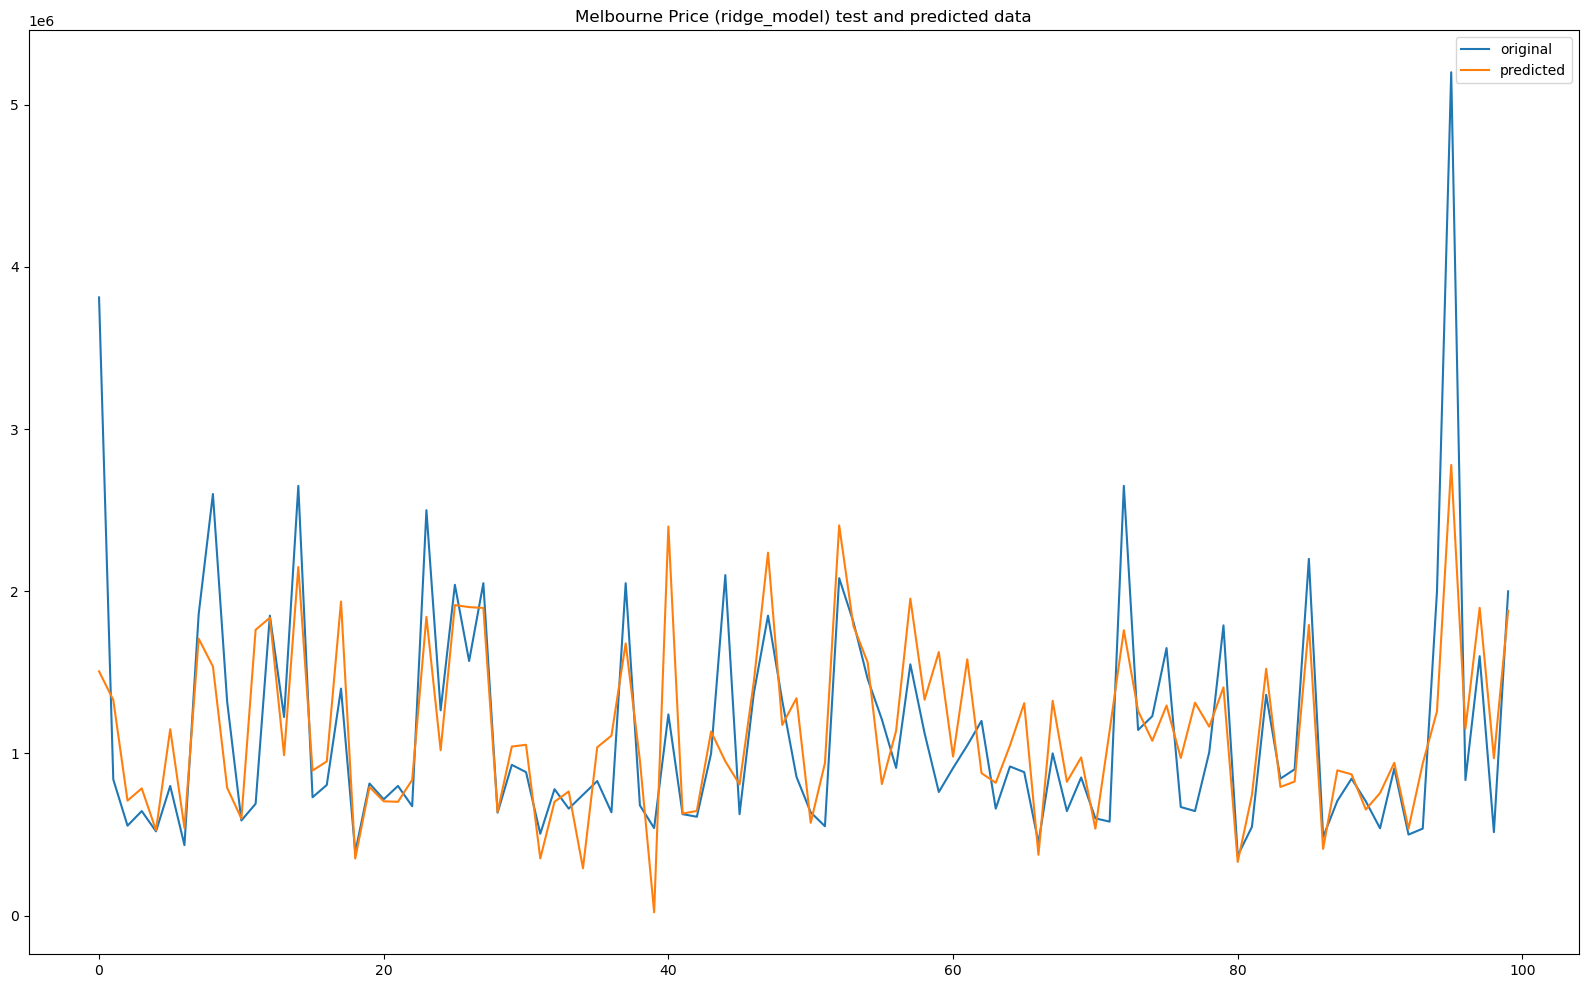

In [39]:
# Graph 100 data to see each data from the original data and predicted Ridge Model

X = range(len(y_test.iloc[:100]))
plt.figure(figsize=(20,12))
plt.plot(X, y_test.iloc[:100], label="original")
plt.plot(X, y_pred_ridge[:100], label="predicted")
plt.title("Melbourne Price (ridge_model) test and predicted data")
plt.legend()
plt.show()

In [40]:
# create new row with MAE, RMSE, and R2-score from Ridge
results.loc['Ridge']=[mean_absolute_error(y_test,y_pred_ridge),mean_squared_error(y_test, y_pred_ridge, squared=False),r2_score(y_test,y_pred_ridge)]

### D. XGBRegressor Model

In [41]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred_XGB = model_XGB.predict(X_test)

In [43]:
print('MAE:', mean_absolute_error(y_test, y_pred_XGB))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_XGB)))
print('R2 Score:', r2_score(y_test, y_pred_XGB))

MAE: 157005.83790160995
RMSE: 236259.35335758294
R2 Score: 0.8547193397440982


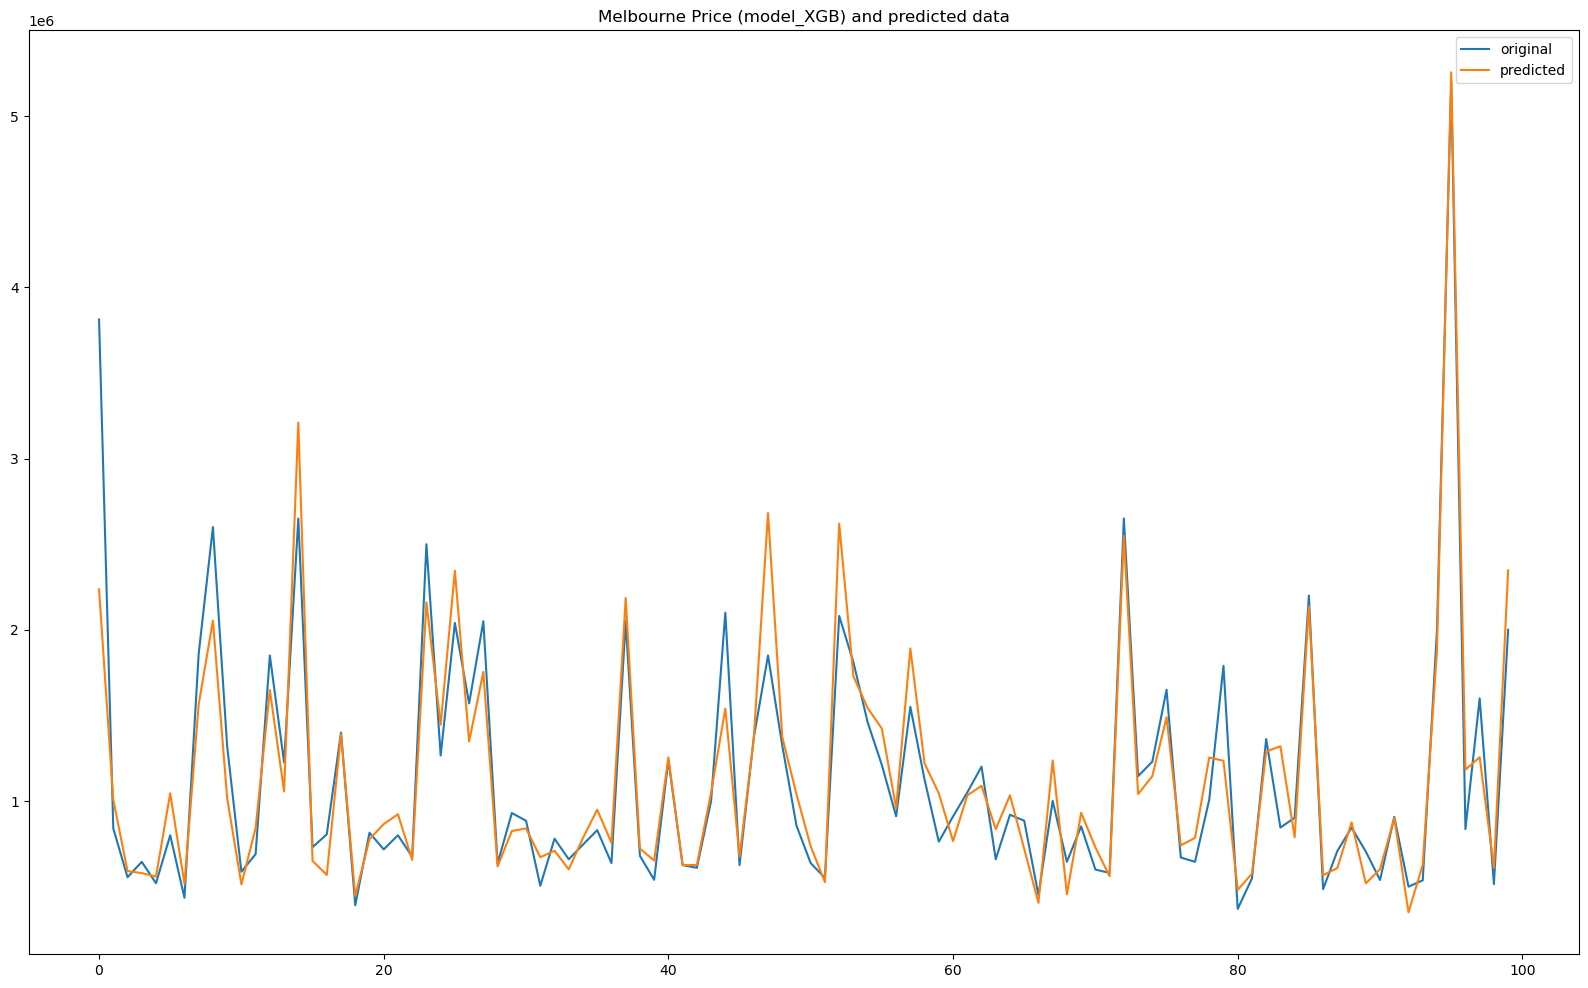

In [44]:
# Graph 100 data to see each data from the original data and predicted for RandomForestClassifier model

X = range(len(y_test.iloc[:100]))
plt.figure(figsize=(20,12))
plt.plot(X, y_test.iloc[:100], label="original")
plt.plot(X, y_pred_XGB[:100], label="predicted")
plt.title("Melbourne Price (model_XGB) and predicted data")
plt.legend()
plt.show()

In [45]:
# create new row with MAE, RMSE, and R2-score from XGBRegressor
results.loc['XGBRegressor']=[mean_absolute_error(y_test,y_pred_XGB),mean_squared_error(y_test, y_pred_XGB, squared=False),r2_score(y_test,y_pred_XGB)]

###  E. RandomForestClassifier Model

In [46]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
y_pred_RF = model_RF.predict(X_test)

In [48]:
print('MAE:', mean_absolute_error(y_test, y_pred_RF))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_RF)))
print('R2 Score:', r2_score(y_test, y_pred_RF))

MAE: 219308.2857142857
RMSE: 354336.0096198991
R2 Score: 0.673216317090517


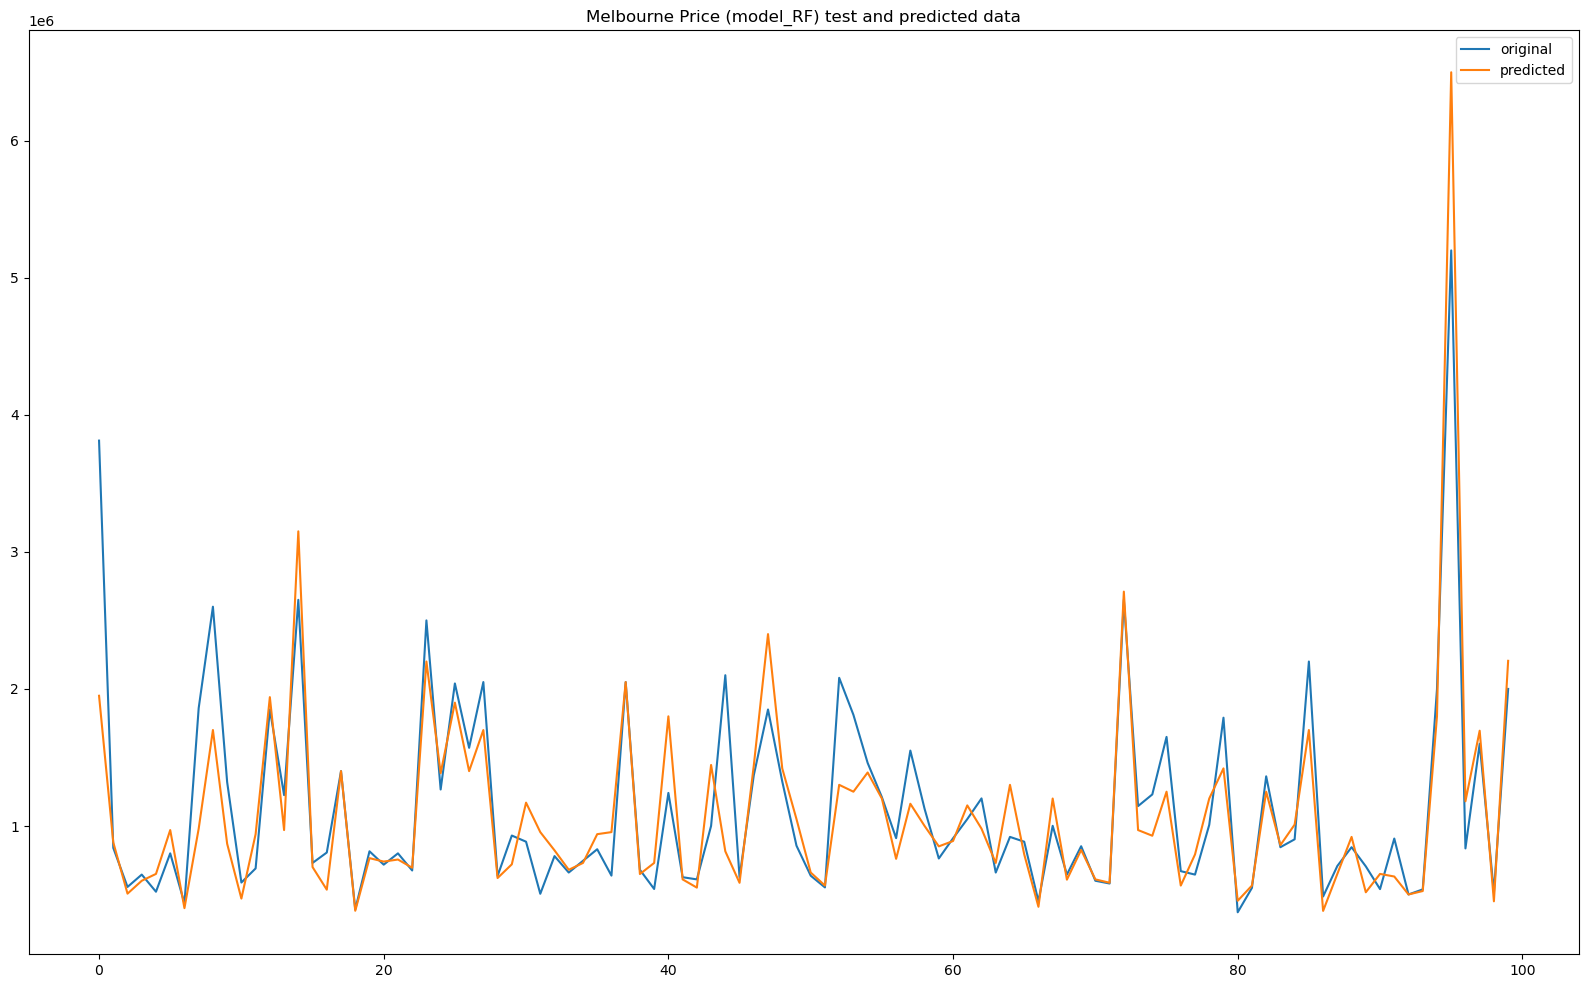

In [49]:
# Graph 100 data to see each data from the original data and predicted for RandomForestClassifier model

X = range(len(y_test.iloc[:100]))
plt.figure(figsize=(20,12))
plt.plot(X, y_test.iloc[:100], label="original")
plt.plot(X, y_pred_RF[:100], label="predicted")
plt.title("Melbourne Price (model_RF) test and predicted data")
plt.legend()
plt.show()

In [50]:
# create new row with MAE, RMSE, and R2-score from RandomForestClassifier
results.loc['RandomForestClassifier']=[mean_absolute_error(y_test,y_pred_RF),mean_squared_error(y_test, y_pred_RF, squared=False),r2_score(y_test,y_pred_RF)]

In [51]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='GnBu',subset=['R2-score'])

,MAE,RMSE,R2-score
XGBRegressor,157005.837902,236259.353358,0.854719
RandomForestClassifier,219308.285714,354336.009620,0.673216
Linear Regression,276635.670855,390453.838965,0.603202
Ridge,278033.214349,390930.162533,0.602234
Linear Regression Normalized,278037.143548,390933.299419,0.602227


### The highest R2-score is XGBRegressor which mean XGBRegressor is better for this dataframe